In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# define model of EGFR pYtag

def model(state,t):
    
    # unpack the state variables
    N1 = state[0]
    N2 = state[1]
    N3 = state[2]
    N4 = state[3]
    N5 = state[4]
    N6 = state[5]
    N7 = state[6]
    N8 = state[7]
    N9 = state[8]
    N10 = state[9]
    N11 = state[10]
    N12 = state[11]
    N13 = state[12]
    N14 = state[13]
    N15 = state[14]
    N16 = state[15]

    # define system of equations
    dN1 = 0; # ligand (L); assumed to be an infinite bath
    
    dN2 = -k8*N2*(2*N6 + 2*N7 + N9 + N10 + N11) \
    + k9*(N8 + N9 + N10 + N11 + 2*N12 + 2*N13 + 2*N14 + N15 + N16); # ZtSH2 (*)

    dN3 = -k1*N3*N1 + k2*N4 \
    - 2*k5*N3**2 - k5*N3*N4 - k5*N3*N15 - k5*N3*N16 \
    + 2*k6*N5 + k6*N8 + k7*N6 + k7*N9 \
    + k9*N15; # EGFR

    dN4 = k1*N3*N1 - k2*N4 \
    - k5*N3*N4 - 2*k5*N4**2 - k5*N4*N15 - k5*N4*N16 \
    + k7*N6 + k7*N10 + 2*k7*N7 + k7*N11 \
    + k9*N16; # L-EGFR
    
    dN5 = -2*k1*N5*N1 + k3*N6 + k5*N3**2 - k6*N5 + k9*N8; # EGFR:EGFR
    
    dN6 = -k1*N6*N1 + 2*k4*N7 + 2*k1*N5*N1 - k3*N6 \
    + k5*N3*N4 - k7*N6 \
    - 2*k8*N6*N2 \
    + k9*N9 + k9*N10; # L-EGFR:EGFR
    
    dN7 = k1*N6*N1 - 2*k4*N7 \
    + k5*N4**2 - k7*N7 \
    - 2*k8*N7*N2 \
    + k9*N11; # L-EGFR:L-EGFR
    
    dN8 = -2*k1*N8*N1 + k3*N9 + k3*N10 \
    + k5*N3*N15 - k6*N8 \
    - k9*N8 + 2*k9*N12; # EGFR*:EGFR
    
    dN9 = k1*N8*N1 - k1*N9*N1 - k3*N9 + k4*N11 \
    + k5*N3*N16 - k7*N9 \
    + k8*N6*N2 - k8*N9*N2 \
    - k9*N9 + k9*N13; # L-EGFR*:EGFR
    
    dN10 = k1*N8*N1 - k3*N10 - k1*N10*N1 + k4*N11 \
    + k5*N4*N15 - k7*N10 \
    + k8*N6*N2 - k9*N10 \
    - k8*N10*N2 + k9*N13; # L-EGFR:EGFR*
    
    dN11 = k1*N9*N1 - 2*k4*N11 + k1*N10*N1 \
    + k5*N4*N16 - k7*N11 \
    + 2*k8*N7*N2 - k9*N11 - k8*N11*N2 + 2*k9*N14; # L-EGFR*:L-EGFR
    
    dN12 = -2*k1*N12*N1 + k3*N13 \
    + k5*N15**2 - k6*N12 \
    - 2*k9*N12; # EGFR*:EGFR*

    dN13 = 2*k1*N12*N1 - k3*N13 - k1*N13*N1 + 2*k4*N14 \
    + k5*N15*N16 - k7*N13 \
    + k8*N9*N2 - 2*k9*N13 + k8*N10*N2; # L-EGFR*:EGFR*
    
    dN14 = k1*N13*N1 - 2*k4*N14 \
    + k5*N16**2 - k7*N14 \
    + k8*N11*N2 - 2*k9*N14; # L-EGFR*:L-EGFR*
    
    dN15 = -k1*N15*N1 + k2*N16 \
    - 2*k5*N15**2 + 2*k6*N12 - k5*N15*N3 + k6*N8 - k5*N15*N16 + k7*N13 - k5*N15*N4 + k7*N10 \
    - k9*N15; # EGFR*
    
    dN16 = k1*N15*N1 - k2*N16 \
    - 2*k5*N16**2 + 2*k7*N14 - k5*N16*N15 + k7*N13 - k5*N16*N3 + k7*N9 - k5*N16*N4 + k7*N11 \
    - k9*N16; # L-EGFR*
    
    return(dN1,dN2,dN3,dN4,dN5,dN6,dN7,dN8,dN9,dN10,dN11,dN12,dN13,dN14,dN15,dN16)


In [14]:
# define rate constants (function version)

def init_conds():
    
    global k1, k2, k3, k4, k5, k6, k7, k8, k9
    global Conc, MW, Cell_rad, EGFR_dens, EGFR_init, ZtSH2_EGFR_rat
    global N0_1, N0_2, N0_3, N0_4, N0_5, N0_6, N0_7, N0_8, N0_9, N0_10, N0_11, N0_12, N0_13, N0_14, N0_15, N0_16
    global state0, t

    k1 = 0.03; # receptor-ligand binding (1/(nM * s))
    k2 = k1 * 0.22; # ligand dissociating from L-EGFR (1/s)

    k3 = k1 * 0.19; # ligand dissociating from L-EGFR:EGFR (1/s)

    k4 = k1 * 2.9; # ligand dissociating from L-EGFR:L-EGFR (1/s)

    k5 = 1e-5; # receptor dimerization (1/(nM * s))
    k6 = k5 * 10 * 50; # EGFR:EGFR dissociation (1/s)

    k7 = k5 * 10; # L-EGFR:EGFR dissociation (1/s)

    k8 = 5; # ZtSH2 binding to receptor (1/(nM * s))
    k9 = k8 * 10 / 3; # ZtSH2 dissociating from receptor (1/s)

    # define initial conditions
    Conc = 20; # concentration of ligand (ng/mL)
    MW = 6; # molecular weight of ligand in kDa (EGF ~ 6 kDa; EREG ~ 5.4 kDa)

    Cell_rad = 10; # cell radius (µm)
    EGFR_dens = 250e3; # EGFR molecules per cell

    EGFR_init = EGFR_dens / 6.022e23 * 1e9 / (4/3 * np.pi * Cell_rad**3 * 1e-15); # concentration EGFR (nM)
    print("EGFR_init = " + str(round(EGFR_init,2)) + " nM")

    ZtSH2_EGFR_rat = 1; # ratio of ZtSH2 molecules to EGFR molecules

    # species concentrations (nM)
    N0_1 = Conc/MW; # ligand
    N0_2 = EGFR_init * ZtSH2_EGFR_rat ; # ZtSH2

    # calculate EGFR and EGFR:EGFR based on thermodynamic equilibrium (nM)
    if (k5 == 0):
        N0_5 = 0
    else:
        N0_5 = (4*EGFR_init + k6/k5 - np.sqrt((-4*EGFR_init-k6/k5)**2 - 16*EGFR_init**2)) / 8; # EGFR:EGFR

    N0_3 = EGFR_init - 2*N0_5; # EGFR

    # rest of species (nM)
    N0_4 = 0; # L-EGFR
    N0_6 = 0; # L-EGFR:EGFR
    N0_7 = 0; # L-EGFR:L-EGFR
    N0_8 = 0; # EGFR*:EGFR
    N0_9 = 0; # L-EGFR*:EGFR
    N0_10 = 0; # L-EGFR:EGFR*
    N0_11 = 0; # L-EGFR*:L-EGFR
    N0_12 = 0; # EGFR*:EGFR*
    N0_13 = 0; # L-EGFR*:EGFR*
    N0_14 = 0; # L-EGFR*:L-EGFR*
    N0_15 = 0; # EGFR*
    N0_16 = 0; # L-EGFR*

    # compile initial conditions
    state0 = [N0_1,N0_2,N0_3,N0_4,N0_5,N0_6,N0_7,N0_8,N0_9,N0_10,N0_11,N0_12,N0_13,N0_14,N0_15,N0_16]

    # define time for integration
    t = np.linspace(0,3000,6000)

    print("resest initial conditions!")
    return("init_conds")

In [15]:
# run simulation and store state variables
init_conds()

state = odeint(model, state0, t)

ZtSH2_norm = (state[:,1] - state[0,1]) / state[0,1] * -1 # fraction of cytosolic ZtSH2 cleared


EGFR_init = 99.11 nM
resest initial conditions!


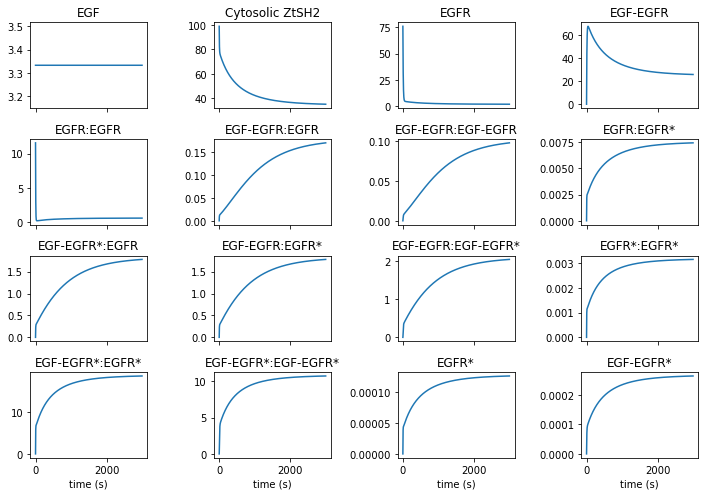

In [16]:
# plot simulation states
fig, axs = plt.subplots(4, 4,sharex=True,figsize=(10,7))
axs[0, 0].plot(t, state[:,0])
axs[0, 0].set_title("EGF")
axs[0, 1].plot(t, state[:,1])
axs[0, 1].set_title("Cytosolic ZtSH2")
axs[0, 2].plot(t, state[:,2])
axs[0, 2].set_title("EGFR")
axs[0, 3].plot(t, state[:,3])
axs[0, 3].set_title("EGF-EGFR")
axs[1, 0].plot(t, state[:,4])
axs[1, 0].set_title("EGFR:EGFR")
axs[1, 1].plot(t, state[:,5])
axs[1, 1].set_title("EGF-EGFR:EGFR")
axs[1, 2].plot(t, state[:,6])
axs[1, 2].set_title("EGF-EGFR:EGF-EGFR")
axs[1, 3].plot(t, state[:,7])
axs[1, 3].set_title("EGFR:EGFR*")
axs[2, 0].plot(t, state[:,8])
axs[2, 0].set_title("EGF-EGFR*:EGFR")
axs[2, 1].plot(t, state[:,9])
axs[2, 1].set_title("EGF-EGFR:EGFR*")
axs[2, 2].plot(t, state[:,10])
axs[2, 2].set_title("EGF-EGFR:EGF-EGFR*")
axs[2, 3].plot(t, state[:,11])
axs[2, 3].set_title("EGFR*:EGFR*")
axs[3, 0].plot(t, state[:,12])
axs[3, 0].set_title("EGF-EGFR*:EGFR*")
axs[3, 1].plot(t, state[:,13])
axs[3, 1].set_title("EGF-EGFR*:EGF-EGFR*")
axs[3, 2].plot(t, state[:,14])
axs[3, 2].set_title("EGFR*")
axs[3, 3].plot(t, state[:,15])
axs[3, 3].set_title("EGF-EGFR*")

axs[3,3].set_xlabel("time (s)")
axs[3,2].set_xlabel("time (s)")
axs[3,1].set_xlabel("time (s)")
axs[3,0].set_xlabel("time (s)")

fig.tight_layout()


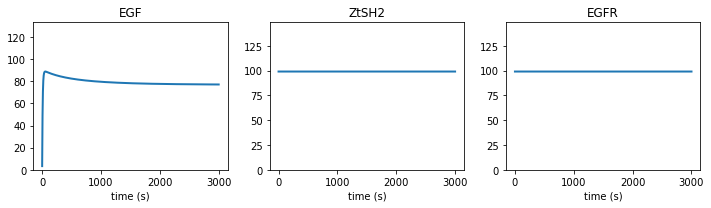

In [17]:
# make sure mass balance closes

# total EGF (nM)
EGF_sum = state[:,0] + state[:,3] + state[:,5] + 2*state[:,6] + state[:,8] + state[:,9] + 2*state[:,10] \
+ state[:,12] + 2*state[:,13] + state[:,15] # mass balance not supposed to close since extracellular ligand conc. considered infinite

# total ZtSH2 (nM)
ZtSH2_sum = state[:,1] + state[:,7] + state[:,8] + state[:,9] + state[:,10] + \
2*state[:,11] + 2*state[:,12] + 2*state[:,13] + state[:,14] + state[:,15]

# total EGFR (nM)
EGFR_sum = state[:,2] + state[:,3] + 2*(state[:,4] + state[:,5] + state[:,6] + state[:,7] \
                                       + state[:,8] + state[:,9] + state[:,10] + state[:,11] \
                                       + state[:,12] + state[:,13]) + state[:,14] + state[:,15]

# plot results
fig,axs = plt.subplots(1,3,sharex=True,figsize = (10,3))

axs[0].plot(t, EGF_sum, linewidth=2)
axs[0].set_ylim([0, max(EGF_sum)*1.5])
axs[0].set_title("EGF")
axs[0].set_xlabel("time (s)")

axs[1].plot(t, ZtSH2_sum, linewidth=2)
axs[1].set_ylim([0,ZtSH2_sum[0]*1.5])
axs[1].set_title("ZtSH2")
axs[1].set_ylim([0,max(ZtSH2_sum)*1.5])
axs[1].set_xlabel("time (s)")

axs[2].plot(t, EGFR_sum, linewidth=2)
axs[2].set_ylim([0,EGFR_sum[0]*1.5])
axs[2].set_title("EGFR")
axs[2].set_xlabel("time (s)")

fig.tight_layout()


EGFR_init = 99.11 nM
resest initial conditions!


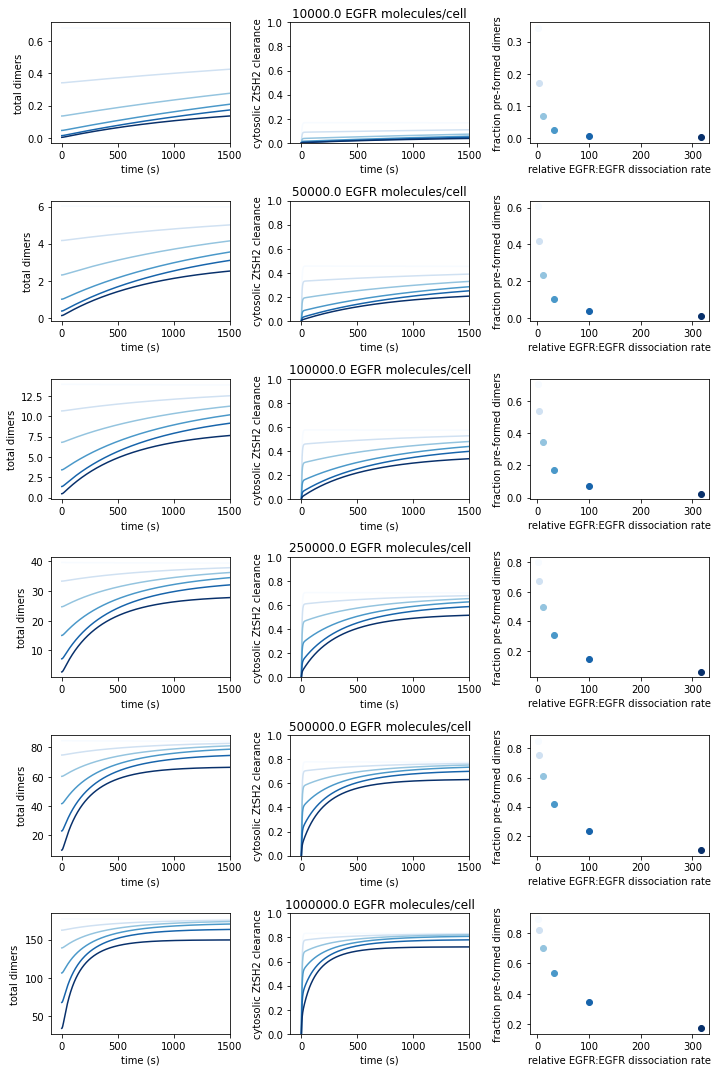

In [18]:
# tune ligandless dimer affinity

init_conds()

# parameters to scan through
alpha = np.logspace(0,2.5, num=6) # off rate relative to EGF-EGFR:EGF-EGFR
EGFRnum = [1e4,5e4,1e5,2.5e5,5e5,1e6]; # number of EGFR molecules per cell

# figure settings
colors = plt.cm.Blues(np.linspace(0, 1, len(alpha)))
fig, axs = plt.subplots(len(EGFRnum),3,figsize=(10,15))

# create dataframe to store data
cols = {'time':[], 'EGFR_per_cell':[], 'relative_off_rate':[], 'frac':[], 'ZtSH2_clearance':[]}
data_preformed_dimers = pd.DataFrame(data = cols)

# run simulation

for n in range(len(EGFRnum)):
    
    EGFR_dens = EGFRnum[n]; # EGFR molecules per cell

    EGFR_init = EGFR_dens / 6.022e23 * 1e9 / (4/3 * np.pi * Cell_rad**3 * 1e-15); # nM EGFR
    ZtSH2_EGFR_rat = 1; # ratio of ZtSH2 molecules to EGFR molecules
    
    N0_2 = EGFR_init * ZtSH2_EGFR_rat ; # ZtSH2

    for j in range(len(alpha)):
        
        data_temp = pd.DataFrame(data=cols); # temporary dataframe

        k5 = 1e-5; # EGFR:EGFR dimerization
        k6 = k5 * 10 * alpha[j]; # EGFR:EGFR dissociation

        if (k5 == 0):
            N0_5 = 0
        else:
            N0_5 = (4*EGFR_init + k6/k5 - np.sqrt((-4*EGFR_init-k6/k5)**2 - 16*EGFR_init**2)) / 8; # EGFR:EGFR

        N0_3 = EGFR_init - 2*N0_5; # EGFR
        state0 = [N0_1,N0_2,N0_3,N0_4,N0_5,N0_6,N0_7,N0_8,N0_9,N0_10,N0_11,N0_12,N0_13,N0_14,N0_15,N0_16]

        state = odeint(model, state0, t)
        ZtSH2_norm = (state[:,1] - state[0,1]) / state[0,1] * -1 # fraction of cytosolic ZtSH2 cleared

        dimer_sum = np.sum(state[:,4:14],1)
        
        # store results in dataframe
        data_temp['time'] = t;
        data_temp['EGFR_per_cell'] = EGFRnum[n];
        data_temp['relative_off_rate'] = alpha[j];
        data_temp['frac'] = N0_5*2/EGFR_init;
        data_temp['ZtSH2_clearance'] = ZtSH2_norm;
        
        data_preformed_dimers = pd.concat([data_preformed_dimers,data_temp])

        # plot results
        axs[n,0].plot(t, dimer_sum,color=colors[j])
        axs[n,0].set_xlabel("time (s)")
        axs[n,0].set_ylabel("total dimers")
        axs[n,0].set_xlim([-100,1500])

        axs[n,1].plot(t, ZtSH2_norm,color=colors[j])
        axs[n,1].set_xlabel("time (s)")
        axs[n,1].set_ylabel("cytosolic ZtSH2 clearance")
        axs[n,1].set_title(str(EGFRnum[n]) + " EGFR molecules/cell")
        axs[n,1].set_ylim([0,1])
        axs[n,1].set_xlim([-100,1500])

        axs[n,2].scatter(alpha[j],N0_5*2/EGFR_init,color=colors[j])
        axs[n,2].set_xlabel("relative EGFR:EGFR dissociation rate")
        axs[n,2].set_ylabel("fraction pre-formed dimers")
    
fig.tight_layout()

data_preformed_dimers.to_csv("data_preformed_dimers.csv"); # save data in csv

EGFR_init = 99.11 nM
resest initial conditions!


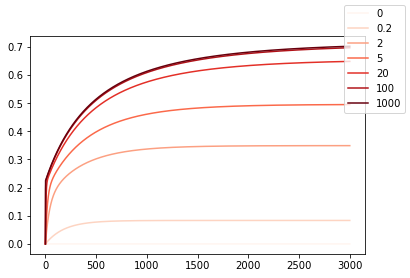

In [19]:
# different ligand concentrations

init_conds()

# parameters to scan through
dose = [0,0.2,2,5,20,100,1000]; # concentration of ligand in ng/mL
colors = plt.cm.Reds(np.linspace(0, 1, len(dose)))

ax = plt.figure()

for j in range(len(dose)):
    
    N0_1 = dose[j]/MW; # ligand (nM)
    state0 = [N0_1,N0_2,N0_3,N0_4,N0_5,N0_6,N0_7,N0_8,N0_9,N0_10,N0_11,N0_12,N0_13,N0_14,N0_15,N0_16]
    
    state = odeint(model, state0, t)
    ZtSH2_norm = (state[:,1] - state[0,1]) / state[0,1] * -1 # fraction of cytosolic ZtSH2 cleared
    
    plt.plot(t,ZtSH2_norm,label = str(round(dose[j],2)),color = colors[j])

ax.legend()

EGFR_init = 99.11 nM
resest initial conditions!


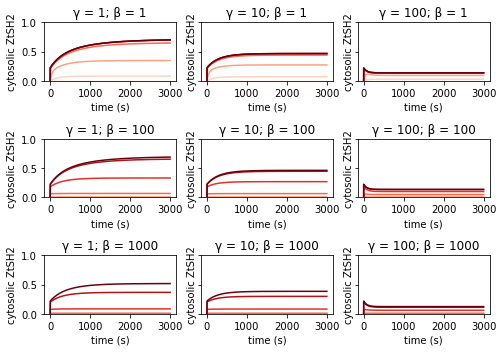

In [20]:
# tune ligand affinity

init_conds()

# parameters to scan through
dose = [0,0.2,2,20,200,2000,5000] # ligand concentration (ng/mL)
beta = [1,100,1000]; # relative ligand off rate
gamma = [1,10,100]; # relative ligand-EGFR:ligand-EGFR dissociation

# figure settings
colors = plt.cm.Reds(np.linspace(0, 1, len(dose)))
fig, axs = plt.subplots(len(beta),len(gamma),figsize=(7,5),sharey=True)

# create dataframe to store data
cols = {'time':[], 'ligand_off_rate':[], 'dimer_off_rate':[], 'ligand_dose':[], 'ZtSH2_clearance':[]}
data_ligand_affinity = pd.DataFrame(data = cols)

# run simulation

for n in range(len(gamma)):
    
    k5 = 1e-5; # EGF-EGFR:EGFR dimerization
    k7 = k5 * 10 * gamma[n]; # EGF-EGFR:EGFR dissociation

    for j in range(len(beta)):

        k1 = 0.03; # EGF-EGFR EGF binding (1/(nM * s))
        k2 = k1 * 0.22 * beta[j]; # EGF-EGFR EGF unbinding

        k3 = k1 * 0.19 * beta[j]; # EGF-EGFR:EGFR EGF unbinding

        k4 = k1 * 2.9 * beta[j]; # EGF-EGFR:EGF-EGFR EGF unbinding

        for k in range(len(dose)):

            # create temporary dataframe
            data_temp = pd.DataFrame(data=cols)
            
            Conc = dose[k];
            N0_1 = Conc/MW;
            state0 = [N0_1,N0_2,N0_3,N0_4,N0_5,N0_6,N0_7,N0_8,N0_9,N0_10,N0_11,N0_12,N0_13,N0_14,N0_15,N0_16]

            state = odeint(model, state0, t,mxstep=5000000)
            ZtSH2_norm = (state[:,1] - state[0,1]) / state[0,1] * -1 # fraction of cytosolic ZtSH2 cleared

            # append data to dataframe
            data_temp["time"] = t;
            data_temp["ligand_off_rate"] = beta[j];
            data_temp["dimer_off_rate"] = gamma[n];
            data_temp["ligand_dose"] = dose[k];
            data_temp["ZtSH2_clearance"] = ZtSH2_norm;
            
            data_ligand_affinity = pd.concat([data_ligand_affinity,data_temp])
            
            # plot data
            axs[j,n].plot(t,ZtSH2_norm,label = str(dose[k]),color = colors[k])
            axs[j,n].set_title("γ = " + str(gamma[n]) + "; β = " + str(beta[j]))
            axs[j,n].set_ylabel("cytosolic ZtSH2")
            axs[j,n].set_xlabel("time (s)")
            axs[j,n].set_ylim([0,1])
            

fig.tight_layout()

data_ligand_affinity.to_csv("data_ligand_affinity.csv")


EGFR_init = 99.11 nM
resest initial conditions!


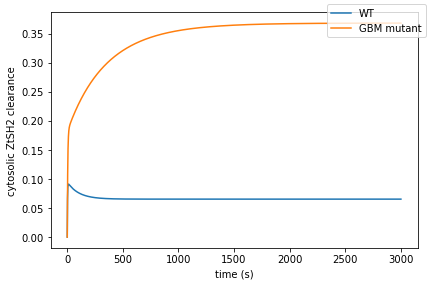

In [21]:
# prediction for EGFR GBM mutants

init_conds()

# parameters to scan through
beta = [50,50/6]; # relative ligand-receptor off rate
gamma = [100,100/650] # relative dimer dissociation rate
label = ['WT','GBM mutant']; # legend

fig = plt.figure()

# create dataframe to store data
cols = {'time':[], 'ligand_off_rate':[], 'dimer_off_rate':[], 'ZtSH2_clearance':[]}
data_GBMsimulation = pd.DataFrame(data = cols)

# run simulation

for k in range(len(beta)):
    
    # create temporary dataframe
    data_temp = pd.DataFrame(data=cols)
    
    # define initial conditions
    Conc = 20; # ligand (ng/mL)
    MW = 6; # ligand MW in kDa
    N0_1 = Conc/MW; # EGF molecules (nM)
    
    # change ligand-receptor off rate
    k1 = 0.03; # EGF-EGFR EGF binding (1/(nM * s))
    k2 = k1 * 0.22 * beta[k]; # EGF-EGFR EGF unbinding

    k3 = k1 * 0.19 * beta[k]; # EGF-EGFR:EGFR EGF unbinding

    k4 = k1 * 2.9 * beta[k]; # EGF-EGFR:EGF-EGFR EGF unbinding

    # change dimer dissociation rate
    k5 = 1e-5; # EGF-EGFR:EGFR dimerization
    k7 = k5 * 10 * gamma[k]; # EGF-EGFR:EGFR dissociation
    
    # compile initial conditions
    state0 = [N0_1,N0_2,N0_3,N0_4,N0_5,N0_6,N0_7,N0_8,N0_9,N0_10,N0_11,N0_12,N0_13,N0_14,N0_15,N0_16]

    state = odeint(model, state0, t,mxstep=5000000)
    ZtSH2_norm = (state[:,1] - state[0,1]) / state[0,1] * -1 # fraction of cytosolic ZtSH2 cleared

#     plt.plot(t,ZtSH2_norm,color = colors[k])
    plt.plot(t,ZtSH2_norm,label = label[k])
    plt.ylabel("cytosolic ZtSH2 clearance")
    plt.xlabel("time (s)")
#     plt.ylim([0,0.4])
    
    # append data to dataframe
    data_temp["time"] = t;
    data_temp["ligand_off_rate"] = beta[k];
    data_temp["dimer_off_rate"] = gamma[k];
    data_temp["ZtSH2_clearance"] = ZtSH2_norm;

    data_GBMsimulation = pd.concat([data_GBMsimulation,data_temp])
            

fig.tight_layout()
fig.legend()

data_GBMsimulation.to_csv("data_GBMsimulation.csv")